In [1]:
import os
import codecs
import string
import os
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import pickle
import math
import numpy as np
from nltk.tree import *
from nltk.stem import WordNetLemmatizer 
import random
import numpy as num
from math import exp
from nltk.tokenize import RegexpTokenizer 
from nltk.stem import WordNetLemmatizer 
from tqdm import tqdm
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 

def read(file):
	fp = codecs.open(file,"r",encoding='utf-8', errors='ignore')
	text = fp.read()
	return text

In [9]:

files = []
token = RegexpTokenizer('\s+|\-+|\.+|\@+|\t+|\n+|[0-9]+|\"+|\>+|\,+|\?+|\:+|\{+|\(+|\[+|\)+|\}+|\]+|\<+|\_+|\!+|\/+|\|+|\\+|\*+|\=+|\^+|\$+|\&+|\#+|\*+|\++|;+', gaps = True)
lem = WordNetLemmatizer() 
path='C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/'
for r, d, f in os.walk(path):
	for file in f:
		files.append(os.path.join(r, file))
files.sort()
doc=[]
size=len(files)
count=0
for i in tqdm(range(0,size)):
    text=read(files[i])
    m=token.tokenize(text)
    doc.append(m)
    count+=1
print("#Docs are ",count)

100%|██████████| 5000/5000 [00:08<00:00, 615.89it/s]


#Docs are  5000


In [10]:
# Extracting all valid words
word_list={} # Words collection
count=-1

cosine_index=[] # Document index file

for i in tqdm(range(0,size)):
    count+=1
    index=0
    cosine_index.append({})
    cosine_index[count]['Unique']=0.0
    cosine_index[count]['Total']=0.0
    files[i]=[files[i],len(doc[i])]
    for tk in doc[i]:
        k=tk.lower()
        k=lem.lemmatize(k)
        #k=tk
        
        if  k.lower() not in cosine_index[count].keys():
            cosine_index[count][k.lower()]=1.0
            cosine_index[count]['Unique']+=1.0
            cosine_index[count]['Total']+=1.0
        else:
            cosine_index[count][k.lower()]+=1.0
            cosine_index[count]['Total']+=1.0
        
        if k.lower() not in word_list.keys():
            
            word_list[k.lower()]=[]
            word_list[k.lower()].append(1)
            word_list[k.lower()].append([])
            word_list[k.lower()][1].append([count,1])
            
        else:
            if count != word_list[k.lower()][1][len(word_list[k.lower()][1])-1][0]:
                
                word_list[k.lower()][0]+=1
                word_list[k.lower()][1].append([count,1])
            else:
                word_list[k.lower()][1][word_list[k.lower()][0]-1][1]+=1.0
    
print('#Words are ',len(word_list)) 

100%|██████████| 5000/5000 [00:12<00:00, 393.56it/s]


#Words are  48189


In [11]:
# Storing index table into pickle file

word_list['File_info']=[]
word_list['File_info'].append(len(files))
word_list['File_info'].append(files)
word_list['Cosine_sim']=cosine_index
print("Index table is created")
#index = open('TF-Idf_Q1', 'ab')
#pickle.dump(word_list, index)                
#index.close()
print("Index table is stored")

Index table is created
Index table is stored


In [22]:
def Tf_cal(freq,length):  # Tf calculation
    
    res=0                   ######################################### 1) 
    if freq>0:
        
        res=1
        
    #res=freq               ######################################### 2) 
    
    #res=freq/length        ######################################### 3) 
    
    return res



def Idf_cal(freq,Doc):  # Idf Calculation
    
    res=math.log10((Doc+1)/(freq+1))  ######################################### 3) 
    
    return res

def MutualInfor(N11,N10,N01,N00,N):
    sum=0.0
    if N11!=0:
        sum=N11/N*math.log2((N11*N)/((N11+N10)*(N01+N11))) 
    if N10!=0:
        sum+= N10/N*math.log2((N10*N)/((N11+N10)*(N00+N10)))
    if N01!=0:
        sum+= N01/N*math.log2((N01*N)/((N00+N01)*(N11+N01))) 
    if N00!=0:
        sum+= N00/N*math.log2((N00*N)/((N00+N01)*(N00+N10)))
    
    return sum

def NaiveBayes(cosine,test,feature,toldoc,B):
    
    sum=toldoc.copy()
    sum=np.array(sum)
    sum=np.sum(sum)
    
    max=0
    ind=0
    for i in range(len(toldoc)):
        prob=toldoc[i]/sum
        for k in cosine.keys():
            if k!='File_info' and k!='Cosine_sim' and k!='Total' and k!='Unique' and k not in stop_words and len(k)>1:
                if feature[k]==1:
                    prob=prob*(test[i][k]+1)/(test[i]['Total']+B-1)
        if prob>max:
            max=prob
            ind=i
    
    return ind

def KNN(train,test,val):
    
    arr=[]
    for i in range(len(train)):
        sum=0
        for j in range(len(train[i])):
            sum+=(train[i][j]-test[j])**2
        arr.append([math.sqrt(sum),train[i][1]])
    arr.sort()
    
    return arr
def display(confuse):
    label=['comp.graphics     ', 'sci.med           ', 'talk.politics.misc', 'rec.sport.hockey  ', 'sci.space         ']
    label.sort()
    print(" "*18,end="\t")
    for i in label:
        print(i,end="  ")
    print()
    for i in range(5):
        print(label[i],end="\t ")
        sum=0.0
        for j in range(5):
            sum+=confuse[i][j]
            a=len(str(confuse[i][j]))
            
            print(confuse[i][j],(15-a)*' ',end="\t")
        print("Acc: ",confuse[i][i]/sum*100)
        print()
        
def KNN(train,test):
    
    arr=[]
    for i in range(len(train)):
        ##vec=np.linalg.norm(train[i][0]-test)
        vec=train[i][0]-test
        vec=vec*vec
        vec=np.sum(vec)
        vec=math.sqrt(vec)
        arr.append([vec,train[i][1]])
        
    arr.sort()
    return arr


In [34]:
# Reading Pickle file and Spliting Ratio

dbfile = open('TF-Idf_Q1', 'rb')      
wordlist = pickle.load(dbfile) 
dbfile.close()
tol=wordlist['File_info'][0]
data_df=[]
for i in range(tol):
    data_df.append([i,int(i/1000)])
random.shuffle(data_df)          # Random Shuffle Before spliting into Train and Test dataset

In [41]:
# Please run above two cell first

ratio=float(input("Enter ratio of dataset should be used for training- "))
train=data_df[:int(tol*ratio)]
test=data_df[int(tol*ratio):]
check=[0 for i in range(tol)]
toldoc=[0 for i in range(5)]
print("\n\t\tTotal train points- ",len(train)," Total test points- ",len(test))

ttol=0

for i in range(len(train)):
    check[train[i][0]]=1
    toldoc[int(train[i][0]/1000)]+=1
    ttol+=1
docclass=[[] for i in range(5)]
doclen=[0 for i in range(5)]
miclass=[[] for i in range(5)]

for k in range(tol):
    if check[k]==1:
        doclen[int(k/1000)]+=wordlist['Cosine_sim'][k]['Total']
    
featuretf={}            # Features for Tf-Idf
featuremi={}            # Features for MI
wclass=[{'Total':0} for i in range(5)]

for k in wordlist.keys():
    if k!='File_info' and k!='Cosine_sim' and k not in stop_words and len(k)>1:
        
        featuretf[k]=0
        featuremi[k]=0
        
        arr=[0 for i in range(5)]
        doccou=[0 for i in range(5)]
        for each in wordlist[k][1]:
            ind=int(each[0]/1000)
            if check[each[0]]==1:
                arr[ind]+=each[1]
                doccou[ind]+=1
        cou=0
        for i in range(len(arr)):
            if arr[i]>=1:
                doclen[i]+=arr[i]
                cou+=1
        
        idf=Idf_cal(cou,5)
        cou=doccou.copy()
        cou=np.array(cou)
        cou=np.sum(cou)
        for i in range(len(arr)):
            
            wclass[i][k]=arr[i]
            wclass[i]['Total']+=arr[i]
            docclass[i].append([arr[i]*idf/doclen[i],k,idf,arr[i]])     ##Adding Tf-Idf feature word into each classes
            N11=doccou[i]
            N10=(cou-doccou[i])
            N01=(toldoc[i]-doccou[i])
            N00=(ttol-doccou[i]-(cou-doccou[i])-(toldoc[i]-doccou[i]))
            N=ttol
            mi=MutualInfor(N11,N10,N01,N00,N)
            miclass[i].append([mi,k,N11,N10,N01,N00,N])             ##Adding MI feature word into each classes

for i in range(5):
    docclass[i].sort(reverse=True)
    miclass[i].sort(reverse=True)

Enter ratio of dataset should be used for training-  0.7



		Total train points-  3500  Total test points-  1500


In [42]:
#number=int(input("Number of feature need to be selected- "))
number=100
print()
print("\t ",number," top features word will be choosen from each classes ")

fwordtf=[]
for i in range(5):
    for k in range(number):
        word=docclass[i][k][1]
        if featuretf[word]!=1:
            featuretf[word]=1
            fwordtf.append(word)

fwordmi=[]        
for i in range(5):
    for k in range(number):
        word=miclass[i][k][1]
        if featuremi[word]!=1:
            featuremi[word]=1
            fwordmi.append(word)


	  100  top features word will be choosen from each classes 


In [43]:
# Naive Bayes Algorithm using Tf-Idf feature selection

confuse=[[0 for j in range(5)] for i in range(5)]
        
print("\nNaive Bayes Algorithm-\n")  
cou=0     
BB=len(wclass[0])
for i in test:
    cosine=wordlist['Cosine_sim'][i[0]]
    o=NaiveBayes(cosine,wclass,featuretf,toldoc,BB)
    if o==i[1]:
        cou+=1
        confuse[i[1]][i[1]]+=1
    else:
        confuse[i[1]][o]+=1

#confuse=np.matrix(confuse)
print("\n Confusion Matrix-\n ")
display(confuse)
print()

# Naive Bayes Algorithm using MI feature selection

confuse=[[0 for j in range(5)] for i in range(5)]

print("\nTf-Idf feature based Naive Bayes accuracy- ",cou/len(test)*100)
print()

cou=0     
for i in test:
    cosine=wordlist['Cosine_sim'][i[0]]
    o=NaiveBayes(cosine,wclass,featuremi,toldoc,BB)
    if o==i[1]:
        cou+=1
        confuse[i[1]][i[1]]+=1
    else:
        confuse[i[1]][o]+=1
        
#confuse=np.matrix(confuse)
print("\n Confusion Matrix-\n ")
display(confuse)
print()

print("MI feature based Naive Bayes accuracy- ",cou/len(test)*100)
print()


Naive Bayes Algorithm-


 Confusion Matrix-
 
                  	comp.graphics       rec.sport.hockey    sci.med             sci.space           talk.politics.misc  
comp.graphics     	 261             	2               	26              	14              	2               	Acc:  85.57377049180329

rec.sport.hockey  	 0               	299             	0               	0               	0               	Acc:  100.0

sci.med           	 2               	0               	236             	41              	5               	Acc:  83.09859154929578

sci.space         	 6               	0               	7               	313             	1               	Acc:  95.71865443425077

talk.politics.misc	 0               	0               	2               	1               	282             	Acc:  98.94736842105263



Tf-Idf feature based Naive Bayes accuracy-  92.73333333333333


 Confusion Matrix-
 
                  	comp.graphics       rec.sport.hockey    sci.med             sci.space           talk.poli

In [44]:
# KNN Algorithm using Tf-Idf feature selection

cosine=wordlist['Cosine_sim']
print("\n\tTf-Idf feature based KNN Algorithm-\n")
print()
#kvalue=int(input("Enter value of K in KNN- "))
kval=[1,3,5]

lt=len(train)
t=[]
for i in tqdm(range(len(train))):
    vec=[]
    for k in fwordtf:
        a=0
        if k in cosine[train[i][0]].keys():
            
                freq=cosine[train[i][0]][k]
                length=cosine[train[i][0]]['Total']
                a=Tf_cal(freq,length)
                #a=1

                
        vec.append(a)
    vec=np.array(vec)
    t.append([vec,train[i][1]])

lt=len(test)    
tt=[]
for i in tqdm(range(len(test))):
    vec=[]
    for k in fwordtf:
        a=0
        if k in cosine[test[i][0]].keys():
            
                freq=cosine[test[i][0]][k]
                length=cosine[test[i][0]]['Total']
                a=Tf_cal(freq,length)
                #a=1
            
                
        vec.append(a)
    vec=np.array(vec)
    tt.append([vec,test[i][1]])
    
print()

  
o_tf=[]
for i in tqdm(range(len(test))):
    o=KNN(t,tt[i][0])
    o_tf.append(o)

for kvalue in kval:
    
    confuse=[[0 for j in range(5)] for i in range(5)]
    cou=0.0
    for i in tqdm(range(len(test))):
        
        c=0
        av=[0 for i in range(5)]
        m=0
        ind=0
        o=o_tf[i][:kvalue]
        for j in o:

            av[j[1]]+=1
            if av[j[1]]>m:
                m=av[j[1]]
                ind=j[1]

            if j[1]==test[i][1]:
                c+=1
        if c>=kvalue/2:
            cou+=1
            confuse[test[i][1]][test[i][1]]+=1
        else:
            confuse[test[i][1]][ind]+=1

    print()
    #confuse=np.matrix(confuse)
    print("\n Confusion Matrix-\n ")
    display(confuse)
    print()
    print("\nTf-Idf feature based KNN (k= ",kvalue,") accuracy- ",cou/len(test)*100)
    print()

# KNN Algorithm using MI feature selection

print()
print("\n\tMI feature based KNN Algorithm-\n")
print()

lt=len(train)
t=[]
for i in tqdm(range(len(train))):
    vec=[]
    for k in fwordmi:
        a=0
        if k in cosine[train[i][0]].keys():
                
                freq=cosine[train[i][0]][k]
                length=cosine[train[i][0]]['Total']
                a=Tf_cal(freq,length)
                #a=1
                

                
        vec.append(a)
    vec=np.array(vec)
    t.append([vec,train[i][1]])

lt=len(test)    
tt=[]
for i in tqdm(range(len(test))):
    vec=[]
    for k in fwordmi:
        a=0
        if k in cosine[test[i][0]].keys():
                
                freq=cosine[test[i][0]][k]
                length=cosine[test[i][0]]['Total']
                a=Tf_cal(freq,length)
                #a=1

                
        vec.append(a)
    vec=np.array(vec)
    tt.append([vec,test[i][1]])

print()    

o_mi=[]
for i in tqdm(range(len(test))):
    o=KNN(t,tt[i][0])
    o_mi.append(o)

for kvalue in kval:
    confuse=[[0 for j in range(5)] for i in range(5)]
    cou=0.0
    for i in tqdm(range(len(test))):
        c=0
        o=o_mi[i][:kvalue]

        av=[0 for i in range(5)]
        m=0
        ind=0

        for j in o:
            av[j[1]]+=1
            if av[j[1]]>m:
                m=av[j[1]]
                ind=j[1]

            if j[1]==test[i][1]:
                c+=1
        if c>=kvalue/2:
            cou+=1
            confuse[test[i][1]][test[i][1]]+=1
        else:
            confuse[test[i][1]][ind]+=1

    print()
    #confuse=np.matrix(confuse)
    print("\n Confusion Matrix-\n ")
    display(confuse)
    print()
    print("\nMI feature based KNN (k= ",kvalue,") accuracy- ",cou/len(test)*100)
    print()


	Tf-Idf feature based KNN Algorithm-




100%|██████████| 1500/1500 [00:00<00:00, 5675.49it/s]


100%|██████████| 1500/1500 [00:00<00:00, 300767.57it/s]




 Confusion Matrix-
 
                  	comp.graphics       rec.sport.hockey    sci.med             sci.space           talk.politics.misc  
comp.graphics     	 301             	0               	2               	2               	0               	Acc:  98.68852459016394

rec.sport.hockey  	 0               	299             	0               	0               	0               	Acc:  100.0

sci.med           	 47              	0               	235             	2               	0               	Acc:  82.74647887323944

sci.space         	 31              	0               	25              	271             	0               	Acc:  82.87461773700305

talk.politics.misc	 2               	0               	3               	0               	280             	Acc:  98.24561403508771



Tf-Idf feature based KNN (k=  1 ) accuracy-  92.4



100%|██████████| 1500/1500 [00:00<00:00, 250695.57it/s]




 Confusion Matrix-
 
                  	comp.graphics       rec.sport.hockey    sci.med             sci.space           talk.politics.misc  
comp.graphics     	 296             	0               	7               	2               	0               	Acc:  97.04918032786885

rec.sport.hockey  	 0               	299             	0               	0               	0               	Acc:  100.0

sci.med           	 5               	0               	278             	1               	0               	Acc:  97.88732394366197

sci.space         	 10              	0               	43              	273             	1               	Acc:  83.4862385321101

talk.politics.misc	 3               	0               	5               	0               	277             	Acc:  97.19298245614036



Tf-Idf feature based KNN (k=  3 ) accuracy-  94.33333333333334



100%|██████████| 1500/1500 [00:00<00:00, 188001.08it/s]




 Confusion Matrix-
 
                  	comp.graphics       rec.sport.hockey    sci.med             sci.space           talk.politics.misc  
comp.graphics     	 297             	0               	7               	1               	0               	Acc:  97.37704918032787

rec.sport.hockey  	 0               	299             	0               	0               	0               	Acc:  100.0

sci.med           	 4               	0               	280             	0               	0               	Acc:  98.59154929577466

sci.space         	 18              	0               	53              	254             	2               	Acc:  77.67584097859327

talk.politics.misc	 3               	0               	1               	0               	281             	Acc:  98.59649122807016



Tf-Idf feature based KNN (k=  5 ) accuracy-  93.13333333333334



	MI feature based KNN Algorithm-




100%|██████████| 1500/1500 [00:00<00:00, 6835.40it/s]


100%|██████████| 1500/1500 [00:00<00:00, 300753.19it/s]




 Confusion Matrix-
 
                  	comp.graphics       rec.sport.hockey    sci.med             sci.space           talk.politics.misc  
comp.graphics     	 303             	0               	2               	0               	0               	Acc:  99.34426229508196

rec.sport.hockey  	 0               	299             	0               	0               	0               	Acc:  100.0

sci.med           	 2               	0               	282             	0               	0               	Acc:  99.29577464788733

sci.space         	 0               	0               	5               	322             	0               	Acc:  98.47094801223241

talk.politics.misc	 0               	0               	1               	0               	284             	Acc:  99.64912280701755



MI feature based KNN (k=  1 ) accuracy-  99.33333333333333



100%|██████████| 1500/1500 [00:00<00:00, 214835.44it/s]




 Confusion Matrix-
 
                  	comp.graphics       rec.sport.hockey    sci.med             sci.space           talk.politics.misc  
comp.graphics     	 304             	0               	1               	0               	0               	Acc:  99.672131147541

rec.sport.hockey  	 0               	299             	0               	0               	0               	Acc:  100.0

sci.med           	 2               	0               	282             	0               	0               	Acc:  99.29577464788733

sci.space         	 1               	0               	6               	320             	0               	Acc:  97.85932721712538

talk.politics.misc	 0               	0               	1               	0               	284             	Acc:  99.64912280701755



MI feature based KNN (k=  3 ) accuracy-  99.26666666666667



100%|██████████| 1500/1500 [00:00<00:00, 136738.08it/s]




 Confusion Matrix-
 
                  	comp.graphics       rec.sport.hockey    sci.med             sci.space           talk.politics.misc  
comp.graphics     	 305             	0               	0               	0               	0               	Acc:  100.0

rec.sport.hockey  	 0               	299             	0               	0               	0               	Acc:  100.0

sci.med           	 1               	0               	283             	0               	0               	Acc:  99.64788732394366

sci.space         	 2               	0               	5               	320             	0               	Acc:  97.85932721712538

talk.politics.misc	 0               	0               	0               	0               	285             	Acc:  100.0



MI feature based KNN (k=  5 ) accuracy-  99.4



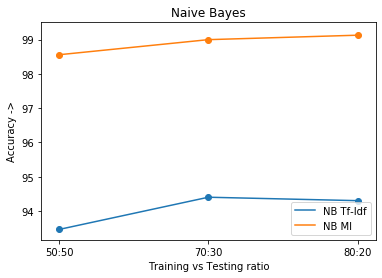

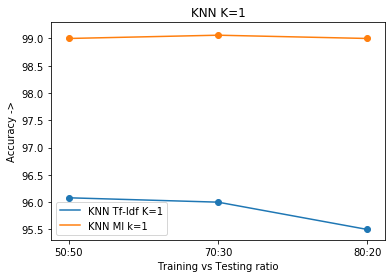

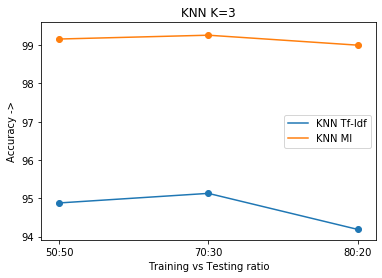

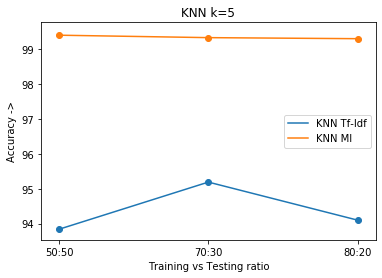

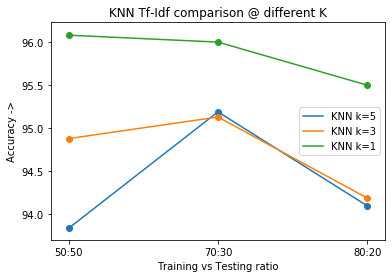

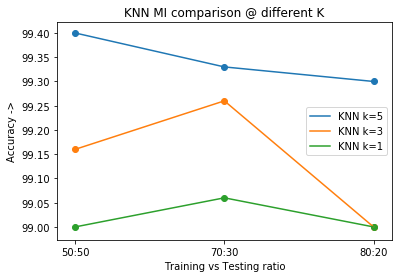

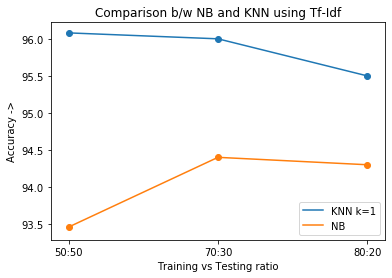

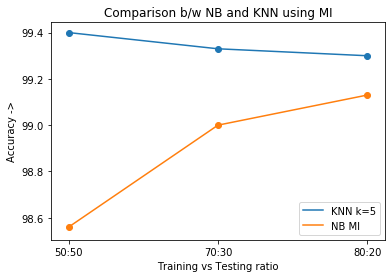

In [45]:
# These are observed accuracy and it is mannually filled in these lists.
## field are respestively (50:50,70:30,80:20)

f=['50:50','70:30','80:20']
nbt=[93.46,94.4,94.3]
nbm=[98.56,99.0,99.13]

plt.plot(f,nbt, label = "NB Tf-Idf") 
plt.scatter(f,nbt)
plt.plot(f,nbm, label = "NB MI") 
plt.scatter(f,nbm)
plt.ylabel('Accuracy ->') 
plt.xlabel('Training vs Testing ratio') 
plt.title('Naive Bayes') 
plt.legend() 
plt.show() 

knnt=[96.08,96.0,95.5]
knnm=[99.0,99.06,99.0]
plt.plot(f,knnt, label = "KNN Tf-Idf K=1") 
plt.scatter(f,knnt)
plt.plot(f,knnm, label = "KNN MI k=1") 
plt.scatter(f,knnm)
plt.ylabel('Accuracy ->') 
plt.xlabel('Training vs Testing ratio') 
plt.title('KNN K=1') 
plt.legend() 
plt.show() 

knn3t=[94.88,95.13,94.19]
knn3m=[99.16,99.26,99.0]
plt.plot(f,knn3t, label = "KNN Tf-Idf") 
plt.scatter(f,knn3t)
plt.plot(f,knn3m, label = "KNN MI") 
plt.scatter(f,knn3m)
plt.ylabel('Accuracy ->') 
plt.xlabel('Training vs Testing ratio') 
plt.title('KNN K=3') 
plt.legend() 
plt.show() 

knn5t=[93.84,95.19,94.1]
knn5m=[99.40,99.33,99.3]
plt.plot(f,knn5t, label = "KNN Tf-Idf") 
plt.scatter(f,knn5t)
plt.plot(f,knn5m, label = "KNN MI") 
plt.scatter(f,knn5m)
plt.ylabel('Accuracy ->') 
plt.xlabel('Training vs Testing ratio') 
plt.title('KNN k=5') 
plt.legend() 
plt.show() 

plt.plot(f,knn5t, label = "KNN k=5") 
plt.scatter(f,knn5t)
plt.plot(f,knn3t, label = "KNN k=3") 
plt.scatter(f,knn3t)
plt.plot(f,knnt, label = "KNN k=1") 
plt.scatter(f,knnt)
plt.ylabel('Accuracy ->') 
plt.xlabel('Training vs Testing ratio') 
plt.title('KNN Tf-Idf comparison @ different K') 
plt.legend() 
plt.show()

plt.plot(f,knn5m, label = "KNN k=5") 
plt.scatter(f,knn5m)
plt.plot(f,knn3m, label = "KNN k=3") 
plt.scatter(f,knn3m)
plt.plot(f,knnm, label = "KNN k=1") 
plt.scatter(f,knnm)
plt.ylabel('Accuracy ->') 
plt.xlabel('Training vs Testing ratio') 
plt.title('KNN MI comparison @ different K') 
plt.legend() 
plt.show()

plt.plot(f,knnt, label = "KNN k=1") 
plt.scatter(f,knnt)
plt.plot(f,nbt, label = "NB") 
plt.scatter(f,nbt)
plt.ylabel('Accuracy ->') 
plt.xlabel('Training vs Testing ratio') 
plt.title('Comparison b/w NB and KNN using Tf-Idf') 
plt.legend() 
plt.show()

plt.plot(f,knn5m, label = "KNN k=5") 
plt.scatter(f,knn5m)
plt.plot(f,nbm, label = "NB MI") 
plt.scatter(f,nbm)
plt.ylabel('Accuracy ->') 
plt.xlabel('Training vs Testing ratio') 
plt.title('Comparison b/w NB and KNN using MI') 
plt.legend() 
plt.show()


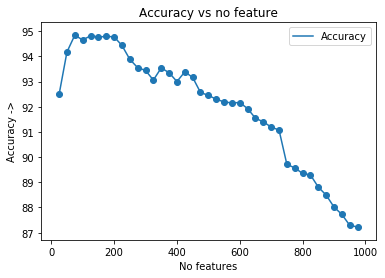

In [46]:
acclist=[92.49166666666666, 94.175, 94.84166666666667, 94.65, 94.81666666666666, 94.76666666666667, 94.79166666666666, 94.775, 94.43333333333332, 93.88333333333333, 93.55, 93.44166666666666, 93.05833333333334, 93.54166666666666, 93.35, 93.0, 93.38333333333333, 93.16666666666667, 92.56666666666665, 92.45, 92.29999999999998, 92.19166666666666, 92.14999999999999, 92.16666666666666, 91.92499999999998, 91.54166666666666, 91.4, 91.19166666666666, 91.075, 89.70833333333333, 89.57500000000002, 89.35, 89.29166666666666, 88.80833333333334, 88.49166666666667, 88.01666666666667, 87.72499999999998, 87.29166666666667, 87.225]
y_axis=[i for i in range(25,1000,25)]
plt.plot(y_axis,acclist, label = "Accuracy") 
plt.scatter(y_axis,acclist)
plt.ylabel('Accuracy ->') 
plt.xlabel('No features') 
plt.title('Accuracy vs no feature') 
plt.legend() 
plt.show()